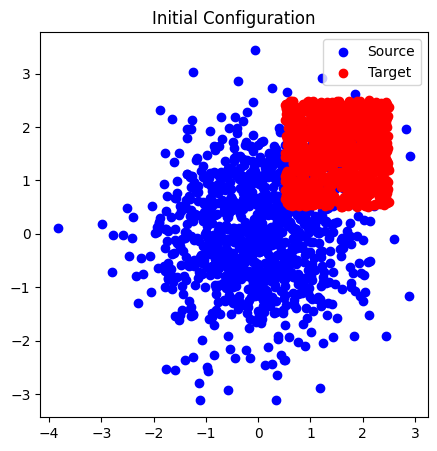

Epoch 10/300, Loss: 1.9536
Epoch 20/300, Loss: 1.6806
Epoch 30/300, Loss: 1.4124
Epoch 40/300, Loss: 1.1505
Epoch 50/300, Loss: 0.8978
Epoch 60/300, Loss: 0.6628
Epoch 70/300, Loss: 0.4650
Epoch 80/300, Loss: 0.3372
Epoch 90/300, Loss: 0.2703
Epoch 100/300, Loss: 0.2309
Epoch 110/300, Loss: 0.2074
Epoch 120/300, Loss: 0.1928
Epoch 130/300, Loss: 0.1830
Epoch 140/300, Loss: 0.1766
Epoch 150/300, Loss: 0.1729
Epoch 160/300, Loss: 0.1708
Epoch 170/300, Loss: 0.1694
Epoch 180/300, Loss: 0.1689
Epoch 190/300, Loss: 0.1685
Epoch 200/300, Loss: 0.1683
Epoch 210/300, Loss: 0.1680
Epoch 220/300, Loss: 0.1679
Epoch 230/300, Loss: 0.1679
Epoch 240/300, Loss: 0.1679
Epoch 250/300, Loss: 0.1679
Epoch 260/300, Loss: 0.1679
Epoch 270/300, Loss: 0.1679
Epoch 280/300, Loss: 0.1679
Epoch 290/300, Loss: 0.1679
Epoch 300/300, Loss: 0.1679


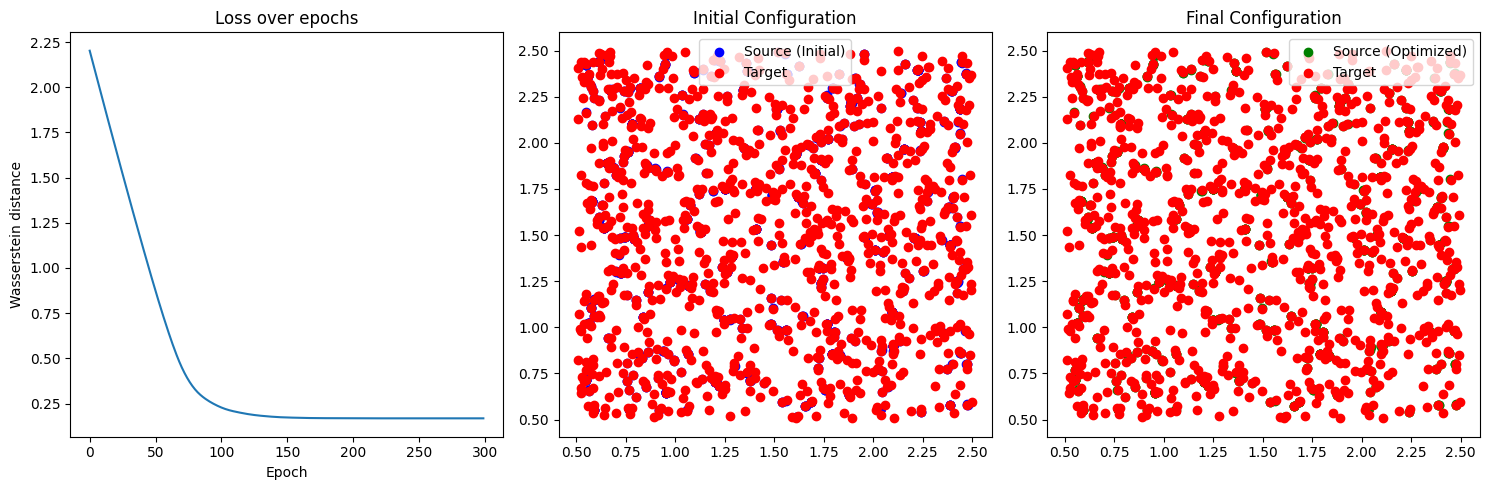

Initial Wasserstein distance: 2.2020
Final Wasserstein distance: 0.1679


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import ot
import torch
from torch.optim import Adam

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate target points
n_points = 1000
Y = np.random.rand(n_points, 2) * 2 + 0.5

# Convert target points to torch tensor
Y_torch = torch.tensor(Y, dtype=torch.float32)

# Initialize source points randomly
X = torch.randn(n_points, 2, requires_grad=True)

# Weights (uniform in this case)
a = torch.ones(n_points) / n_points
b = torch.ones(n_points) / n_points

# Optimizer
optimizer = Adam([X], lr=0.02)

# Training parameters
n_epochs = 300
print_every = 10

# plot initial configuration
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0].detach().numpy(), X[:, 1].detach().numpy(), c='blue', label='Source')
plt.scatter(Y[:, 0], Y[:, 1], c='red', label='Target')
plt.title("Initial Configuration")
plt.legend()
plt.show()

# Training loop
losses = []
for epoch in range(n_epochs):
    optimizer.zero_grad()
    
    # Compute cost matrix
    M = torch.cdist(X, Y_torch)
    
    # Compute Wasserstein distance
    #loss = ot.emd2(a, b, M)
    # compute sinkhorn
    loss = ot.sinkhorn2(a, b, M, 0.1)
    
    # Backpropagation
    loss.backward()
    
    # Update points
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch + 1) % print_every == 0:
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item():.4f}")

# Convert final points to numpy for plotting
X_final = X.detach().numpy()

# Plotting
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(131)
plt.plot(losses)
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Wasserstein distance")

# Plot initial configuration
plt.subplot(132)
plt.scatter(X[:, 0].detach().numpy(), X[:, 1].detach().numpy(), c='blue', label='Source (Initial)')
plt.scatter(Y[:, 0], Y[:, 1], c='red', label='Target')
plt.title("Initial Configuration")
plt.legend()

# Plot final configuration
plt.subplot(133)
plt.scatter(X_final[:, 0], X_final[:, 1], c='green', label='Source (Optimized)')
plt.scatter(Y[:, 0], Y[:, 1], c='red', label='Target')
plt.title("Final Configuration")
plt.legend()

plt.tight_layout()
plt.show()

print(f"Initial Wasserstein distance: {losses[0]:.4f}")
print(f"Final Wasserstein distance: {losses[-1]:.4f}")